# Excercises Electric Machinery Fundamentals
## Chapter 4

## Problem 4-29

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Description

A 100-MVA, 14.4-kV 0.8-PF-lagging, Y-connected synchronous generator has a negligible armature
resistance and a synchronous reactance of 1.0 per-unit. The generator is connected in parallel with a 60-
Hz, 14.4-kV infinite bus that is capable of supplying or consuming any amount of real or reactive power
with no change in frequency or terminal voltage.

In [2]:
Sbase = 100e6 # [VA]
Vbase = 14.4e3 # [V]
ra = 0.0 # pu
xs = 1.0 # pu
PF = 0.8

#### (a)
 
 * What is the synchronous reactance of the generator in ohms?

#### (b)
 
 * What is the internal generated voltage $E_A$ of this generator under rated conditions?

#### (c)
 
 * What is the armature current $I_A$ in this machine at rated conditions?

#### (d)
Suppose that the generator is initially operating at rated conditions. If the internal generated voltage $E_A$ is decreased by 5 percent
 
 * What will the new armature current $I_A$ be?

#### (e)
 
 * Repeat part (d) for 10, 15, 20, and 25 percent reductions in $E_A$ .

#### (f)
 
 * Plot the magnitude of the armature current $I_A$ as a function of $E_A$ . 

### SOLUTION

#### (a)
The rated phase voltage of this generator is:

In [3]:
Vphi_base = Vbase / sqrt(3)
print('Vphi = {:.0f} V'.format(Vphi_base))

Vphi = 8314 V


The base impedance of this generator is:

$$Z_\text{base} = \frac{3V^2_{\phi,\text{base}}}{S_\text{base}}$$

In [4]:
Zbase = (3*Vphi_base**2) / Sbase
print('Zbase = {:.2f} Ω'.format(Zbase))

Zbase = 2.07 Ω


Therefore,

In [5]:
Ra = ra * Zbase
Xs = xs * Zbase
print('''
Ra = {:.1f} Ω   Xs = {:.2f} Ω
========================'''.format(Ra, Xs))


Ra = 0.0 Ω   Xs = 2.07 Ω


#### (b)
The rated armature current is:

$$I_A = I_F = \frac{S}{\sqrt{3}V_T}$$

In [6]:
ia = Sbase / (sqrt(3)*Vbase)
print('ia = {:.0f} A'.format(ia))

ia = 4009 A


The power factor is 0.8 lagging, so

In [7]:
Ia_angle = -arccos(PF)
Ia = ia * (cos(Ia_angle) + sin(Ia_angle) * 1j)
print('Ia = {:.0f} A ∠{:.2f}°'.format(abs(Ia), Ia_angle/pi*180))

Ia = 4009 A ∠-36.87°


Therefore, the internal generated voltage is:
$$\vec{E}_A = \vec{V}_\phi + R_A\vec{I}_A + jX_S\vec{I}_A$$

In [8]:
EA = Vphi_base + Ra*Ia + Xs*1j *Ia
EA_angle = arctan(EA.imag/EA.real)
print('''
EA = {:.0f} V ∠{:.2f}°
===================='''.format(abs(EA), EA_angle/pi*180))


EA = 14872 V ∠26.57°


#### (c)
From the above calculations

In [9]:
print('''
Ia = {:.0f} A ∠{:.2f}°
===================='''.format(abs(Ia), Ia_angle/pi*180))


Ia = 4009 A ∠-36.87°


#### (d)
If $E_A$ is decreased by 5%, the armature current will change as shown below. Note that the infinite bus will keep $V_\phi$ and $\omega_m$ constant. Also, since the prime mover hasn’t changed, the power supplied by the generator will be constant.

<img src="figs/Problem_4-29.png" width="60%">

$P = \frac{3V_\phi E_A}{X_S}\sin{\delta} =$ constant, so: $E_{A1}\sin{\delta_1} = E_{A2}\sin{\delta_2}$

With a **5%** decrease,

In [10]:
Ea1 = abs(EA)
Ea2 = Ea1 * 0.95
print('Ea1 = {:.0f} V    Ea2 = {:.0f} V'.format(Ea1, Ea2))

Ea1 = 14872 V    Ea2 = 14129 V


$$\delta_2 = \arcsin\left(\frac{E_{A1}}{E_{A2}}\sin{\delta_1}\right)$$

In [11]:
delta1 = EA_angle
delta2 = arcsin(Ea1/Ea2 * sin(delta1))
print('delta2 = {:.1f}°'.format(delta2/pi*180))
EA2 = Ea2 * exp(1j*delta2)

delta2 = 28.1°


Therefore, the new armature current is:
$$\vec{I}_A = \frac{\vec{E}_{A2} - \vec{V}_\phi}{jX_S}$$

In [12]:
Ia2 = (EA2 - Vphi_base) / (Xs*1j)
Ia2_angle = arctan(Ia2.imag/Ia2.real)
print('''
Ia2 = {:.0f} A ∠{:.1f}°
===================='''.format(abs(Ia2), Ia2_angle/pi*180))


Ia2 = 3781 A ∠-32.0°


#### (e)
Repeating part (d):

With a **10%** decrease,

In [13]:
Ea1 = abs(EA)
Ea3 = Ea1 * 0.9
print('Ea1 = {:.0f} V    Ea3 = {:.0f} V'.format(Ea1, Ea3))

Ea1 = 14872 V    Ea3 = 13385 V


In [14]:
delta1 = EA_angle
delta3 = arcsin(Ea1/Ea3 * sin(delta1))
print('delta3 = {:.1f}°'.format(delta3/pi*180))
EA3 = Ea3 * exp(1j*delta3)

delta3 = 29.8°


Therefore, the new armature current is:

In [15]:
Ia3 = (EA3 - Vphi_base) / (Xs*1j)
Ia3_angle = arctan(Ia3.imag/Ia3.real)
print('''
Ia3 = {:.0f} A ∠{:.1f}°
====================='''.format(abs(Ia3), Ia3_angle/pi *180))


Ia3 = 3581 A ∠-26.4°


With a **15%** decrease,

In [16]:
Ea1 = abs(EA)
Ea4 = Ea1 * 0.85
print('Ea1 = {:.0f} V    Ea4 = {:.0f} V'.format(Ea1, Ea4))

Ea1 = 14872 V    Ea4 = 12641 V


In [17]:
delta1 = EA_angle
delta4 = arcsin(Ea1/Ea4 * sin(delta1))
print('delta4 = {:.1f}°'.format(delta4/pi*180))
EA4 = Ea4 * exp(1j*delta4)

delta4 = 31.7°


Therefore, the new armature current is:

In [18]:
Ia4 = (EA4 - Vphi_base) / (Xs*1j)
Ia4_angle = arctan(Ia4.imag/Ia4.real)
print('''
Ia4 = {:.0f} A ∠{:.1f}°
====================='''.format(abs(Ia4), Ia4_angle/pi *180))


Ia4 = 3416 A ∠-20.1°


With a **20%** decrease,

In [19]:
Ea1 = abs(EA)
Ea5 = Ea1 * 0.80
print('Ea1 = {:.0f} V    Ea5 = {:.0f} V'.format(Ea1, Ea5))

Ea1 = 14872 V    Ea5 = 11898 V


In [20]:
delta1 = EA_angle
delta5 = arcsin(Ea1/Ea5 * sin(delta1))
print('delta5 = {:.1f}°'.format(delta5/pi*180))
EA5 = Ea5 * exp(1j*delta5)

delta5 = 34.0°


Therefore, the new armature current is:

In [21]:
Ia5 = (EA5 - Vphi_base) / (Xs*1j)
Ia5_angle = arctan(Ia5.imag/Ia5.real)
print('''
Ia5 = {:.0f} A ∠{:.1f}°
====================='''.format(abs(Ia5), Ia5_angle/pi *180))


Ia5 = 3294 A ∠-13.1°


With a **25%** decrease,

In [22]:
Ea1 = abs(EA)
Ea6 = Ea1 * 0.75
print('Ea1 = {:.0f} V    Ea6 = {:.0f} V'.format(Ea1, Ea6))

Ea1 = 14872 V    Ea6 = 11154 V


In [23]:
delta1 = EA_angle
delta6 = arcsin(Ea1/Ea6 * sin(delta1))
print('delta6 = {:.1f}°'.format(delta6/pi*180))
EA6 = Ea6 * exp(1j*delta6)

delta6 = 36.6°


Therefore, the new armature current is:

In [24]:
Ia6 = (EA6 - Vphi_base) / (Xs*1j)
Ia6_angle = arctan(Ia6.imag/Ia6.real)
print('''
Ia6 = {:.0f} A ∠{:.1f}°
====================='''.format(abs(Ia6), Ia6_angle/pi *180))


Ia6 = 3222 A ∠-5.5°


#### (f)
We are going to plot the magnitude of the armature current $I_A$ as a function of $E_A$ below.

Define values for this generator:

In [25]:
Ea = linspace(0.55, 1.00, 46)  * abs(EA)
d1 = EA_angle

Calculate delta for each $E_A$

In [26]:
d_ = arcsin( abs(EA) / Ea * sin(d1))

Calculate Ia for each flux:

In [27]:
Ea_ = Ea * exp(1j*d_)
Ia_ = ( Ea_ - Vphi_base ) / (Xs*1j)

Plot the armature current versus Ea:

<IPython.core.display.Javascript object>


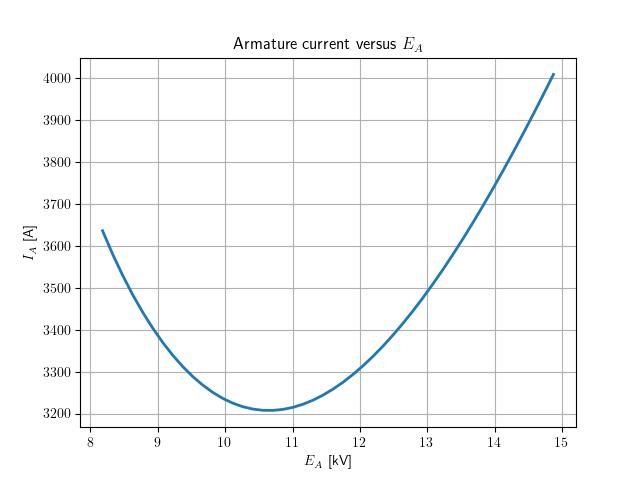

In [28]:
rc('text', usetex=True)   # enable LaTeX commands for plot
title(r'Armature current versus $E_A$')
xlabel(r'$E_A$ [kV]')
ylabel(r'$I_A$ [A]')
plot(abs(Ea_)/1000,abs(Ia_),  linewidth = 2)
grid()